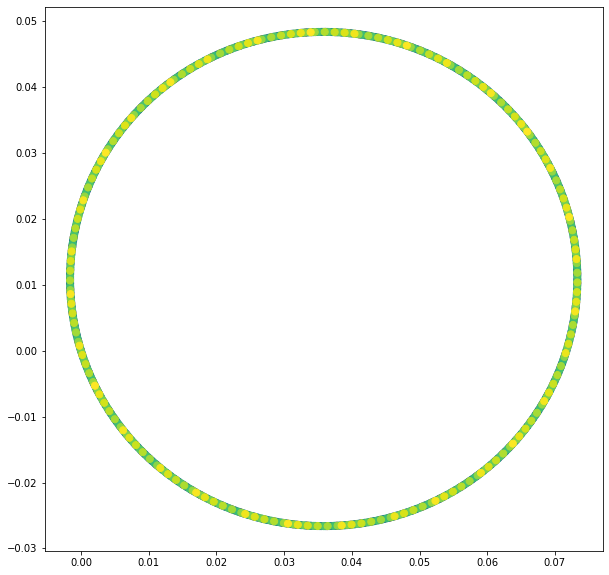

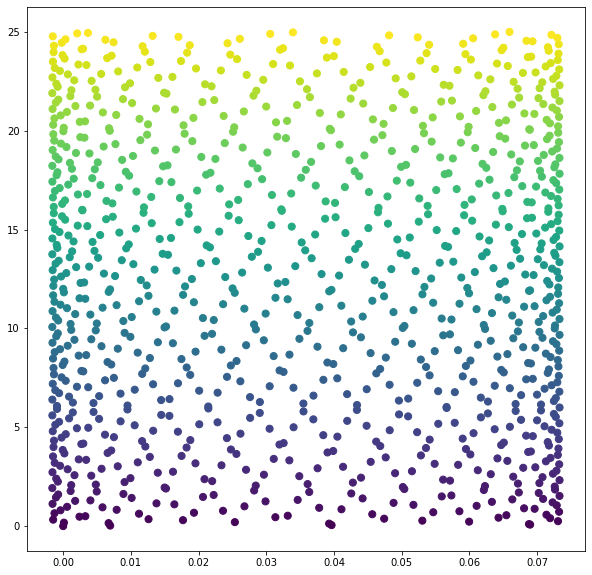

In [45]:
import numpy as np
from matplotlib import pylab as plt

#initialise inputs and constants
#see 2.1.1 of https://iopscience.iop.org/article/10.3847/1538-4365/aab114/pdf

#initial conditions
c=.5 #to keep courant stable
time_total = 1000 #arbitrary total time that will be evenly split up
del_t_count = 1000 #set number of timesteps so implicitly set delta t
q_m=1 #particle charge over mass ratio
v_vect = np.array([-.1*c,.1*c,.1*c]) #velocity without any relativistic considerations, initial condition
b_vect = np.array([0,0,1]) #only z field for now
e_vect = np.array([0,0,0])
x_vect = np.array([0,0,0])

#resultant initial conditions; no need to manually set
current_time = 0 #reset current_time variable
delta_t = time_total/del_t_count #time step as a function of number of step desired
gamma = c/(c**2-np.sum(v_vect**2))
u_vect = v_vect*gamma #initial condition, effectively a function of v_vect only
#plotting_setup
x_list = [x_vect[0]]
y_list = [x_vect[1]]
z_list = [x_vect[2]]
time_list = [0]

#helping method for magnitude
def mag(x): 
    return np.sqrt(sum(i**2 for i in x))

#iterate over the time domain
while(current_time<time_total):
    #half step in position based on starting velocity:
    x_half = x_vect + u_vect*(delta_t/(2*gamma))
    #half step electric acceleration
    u_minus = u_vect + (q_m*delta_t/2)*e_vect
    #intermediate quantities
    gamma_half = np.sqrt(1-((mag(u_minus)/c)**2))
    t_vect = b_vect*(q_m*delta_t/(2*gamma_half))
    s_vect = 2*t_vect*(1/(1+mag(t_vect)**2))
    #magnetic rotation, magnitude of u_vector is conserved
    u_plus = u_minus+np.cross(u_minus+(np.cross(u_minus,t_vect)),s_vect)
    #half step electric
    u_new = u_plus+(delta_t*q_m/2)*e_vect
    #finish position change
    x_new = x_vect+u_new*(delta_t/(2*gamma))
    #update initial values
    x_vect = x_new
    u_vect = u_new
    #update time and append to graphing list
    current_time+=delta_t
    x_list.append(x_vect[0])
    y_list.append(x_vect[1])
    z_list.append(x_vect[2])
    time_list.append(current_time)
    #print('x',x_vect)
plt.figure(figsize=(10,10))
plt.scatter(x_list,y_list,s=50,c=time_list,cmap=plt.cm.viridis)
plt.show()
#second plot
plt.figure(figsize=(10,10))
plt.scatter(x_list,z_list,s=50,c=time_list,cmap=plt.cm.viridis)
plt.show()